In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y limpieza de datos

## (Hecho con la info obtenida en el notebook LimpiezaDeDatos)

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
ejemplo =  pd.read_csv('data/ejemploRespuesta.csv', names = ["id", "precio"] )
test =  pd.read_csv('data/test.csv', parse_dates = ['fecha'])
train = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

In [3]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

In [4]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

In [5]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

In [6]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

In [7]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

In [8]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

In [9]:
train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

In [10]:
#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

In [11]:
train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

In [12]:
train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

In [13]:
#Algunas columnas tienen nulls que no se como encararlos. Por ahora los relleno con 0
train=train.fillna(0)
test=test.fillna(0)

# Armado de features:

In [14]:
train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [15]:
test.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos'],
      dtype='object')

## OneHotEncoding para tipodepropiedad

In [16]:
#Voy a usar OneHotEncoder para convertir la columna categorica tipodepropiedad en dummies.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(train['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies = pd.DataFrame(dummies)
dummies_test = enc.transform(test['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies_test = pd.DataFrame(dummies_test)

In [17]:
dummies.columns=enc.categories_[0].tolist()
dummies=dummies.add_prefix('prop_')
dummies=dummies.astype(np.int8)

dummies_test.columns=enc.categories_[0].tolist()
dummies_test=dummies_test.add_prefix('prop_')
dummies_test=dummies_test.astype(np.int8)

In [18]:
dummies.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,...,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummies_test.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,...,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelo Random Forest

In [20]:
def crear_submit(model, x_train, y_train, x_test, nombre):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    final = test.loc[:, ['id']]
    final['target'] = result
    ruta = "data/submit"+ nombre +".csv"
    final.to_csv(path_or_buf = ruta, index = False )
    df = pd.read_csv(ruta)
    return df

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn.ensemble  import RandomForestRegressor

RF_model=RandomForestRegressor()

### MAE score para RF

In [23]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos']
X = train[Numericos].join(dummies)
Y = train['precio']

In [24]:
#Utilizo el modelo que funciona mejor, Random Forest
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score1 = -scores.mean()
RF_mae_score1

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


901080.9451799619

In [54]:
def mostrar_importancias(X, Y,model):
    model.fit(X,Y)
    importancias = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['importancia']).reset_index()
    importancias.columns = ['feature', 'importancia']
    plt.figure(figsize = (18,8))
    graf = sns.barplot(x = importancias.feature, y = importancias.importancia, orient = 'v')
    graf.set_xlabel("Importancias", fontsize = 20)
    graf.set_ylabel("Features", fontsize = 20)
    plt.xticks(fontsize = 15, rotation = 'vertical')
    plt.yticks(fontsize = 15)

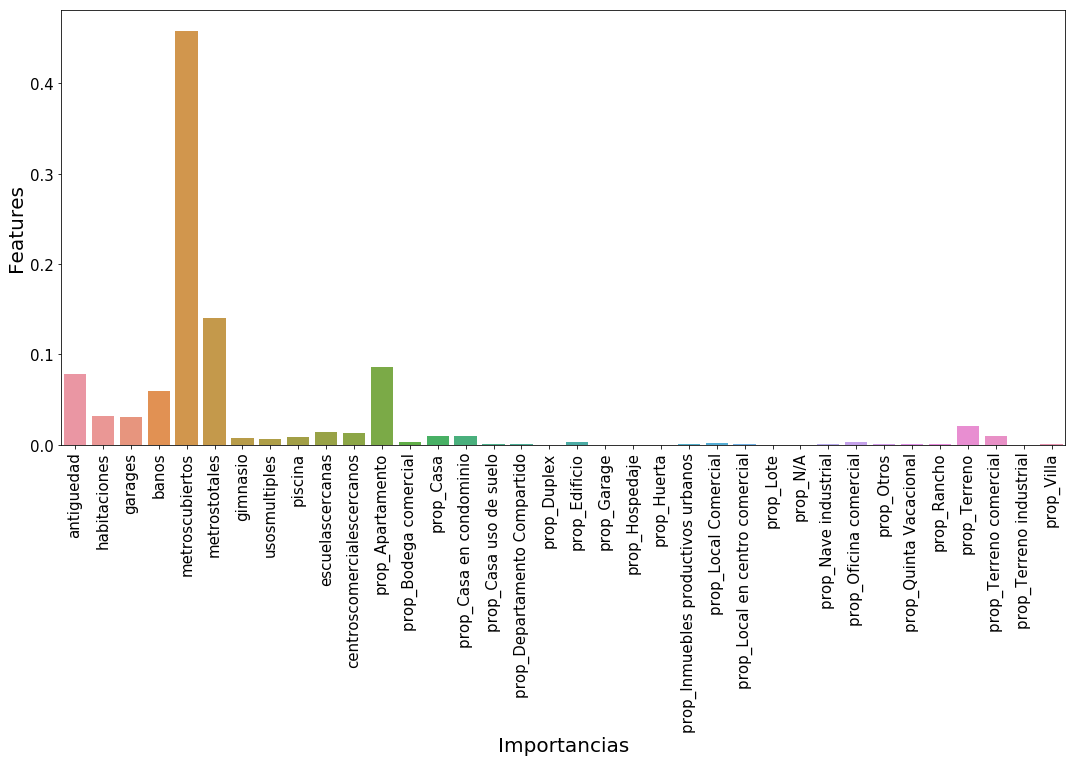

In [29]:
mostrar_importancias(X,Y,RF_model)

## OneHotEncoding para provincias

In [24]:
#Voy a usar OneHotEncoder para convertir la columna categorica provincia en dummies.
enc_prov = OneHotEncoder()
dummies_prov = enc_prov.fit_transform(train['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov = pd.DataFrame(dummies_prov)

dummies_prov_test = enc_prov.transform(test['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov_test = pd.DataFrame(dummies_prov_test)

dummies_prov.columns=enc_prov.categories_[0].tolist()
dummies_prov=dummies_prov.add_prefix('prov_')
dummies_prov=dummies_prov.astype(np.int8)

dummies_prov_test.columns=enc_prov.categories_[0].tolist()
dummies_prov_test=dummies_prov_test.add_prefix('prov_')
dummies_prov_test=dummies_prov_test.astype(np.int8)


In [25]:
dummies_prov.head()

,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,...,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dummies_prov_test.head()

,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,...,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pruebo el modelo

In [27]:
X = X.join(dummies_prov)

In [35]:
#Utilizo el modelo que funciona mejor, Random Forest
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score2 = -scores.mean()
RF_mae_score2

724069.590021751

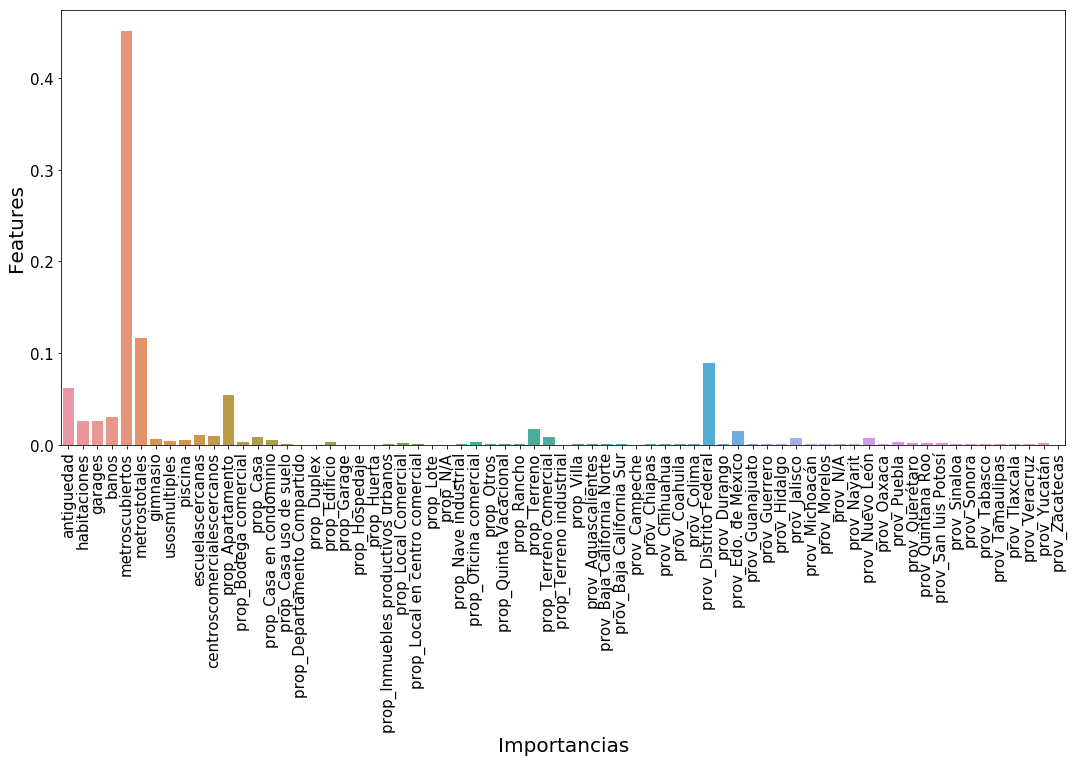

In [36]:
mostrar_importancias(X,Y,RF_model)

## Features sobre el tiempo

En el TP1 vimos como los precios iban en aumento a medida que el tiempo aumentaba, por lo que nos interesa crear nuevos features tomando en cuenta el tiempo en el que se publicaron las propiedades.


Para realizar un nuevo feature comenzaremos añadiendo un peso para cada fecha, este peso irá en aumento a medida que las fechas van subiendo, así simularemos el crecimiento del precio a lo largo del tiempo.

In [28]:
#Califico las fechas de acuerdo a la diferencia entre la fecha actual y la fecha mínima sobre el máximo de dias
fecha_min = train.fecha.min()
fecha_max = train.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
def calificar_fecha(fecha):
    delta = fecha - fecha_min
    return delta.days/delta_max_days

In [29]:
train["puntaje_por_fecha"] = train['fecha'].transform(lambda x: calificar_fecha(x))
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,...,0.000000,0.000000,2015-08-23,0,0,0,0,0,2273000,0.728368
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,19.310205,-99.227655,2013-06-28,0,0,0,1,1,3600000,0.297919
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,0.000000,0.000000,2015-10-17,0,0,0,0,0,1200000,0.758488
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,19.301890,-99.688015,2012-03-09,0,0,0,1,1,650000,0.037240
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,0.000000,0.000000,2016-06-07,0,0,0,0,0,1150000,0.886637


In [30]:
#Set de test
fecha_min = test.fecha.min()
fecha_max = test.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
test["puntaje_por_fecha"] = test['fecha'].transform(lambda x: calificar_fecha(x))
test.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,...,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,-,Mérida,Yucatán,8,1,1,...,113851.0,21.032480,-89.592424,2015-10-24,0,0,0,0,0,0.762322
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0,2,1,...,23620.0,19.332829,-99.152913,2015-05-30,0,0,0,0,1,0.681818
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,-,Acapulco de Juárez,Guerrero,2,2,2,...,129347.0,16.860487,-99.878383,2015-04-02,0,0,0,0,0,0.650055
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10,2,1,...,57125.0,19.640482,-99.127273,2013-08-15,0,0,0,1,1,0.324206


# Modelo Random Forest

### MAE score para RF

In [31]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos', 'puntaje_por_fecha']
X = train[Numericos].join(dummies).join(dummies_prov)
Y = train['precio']

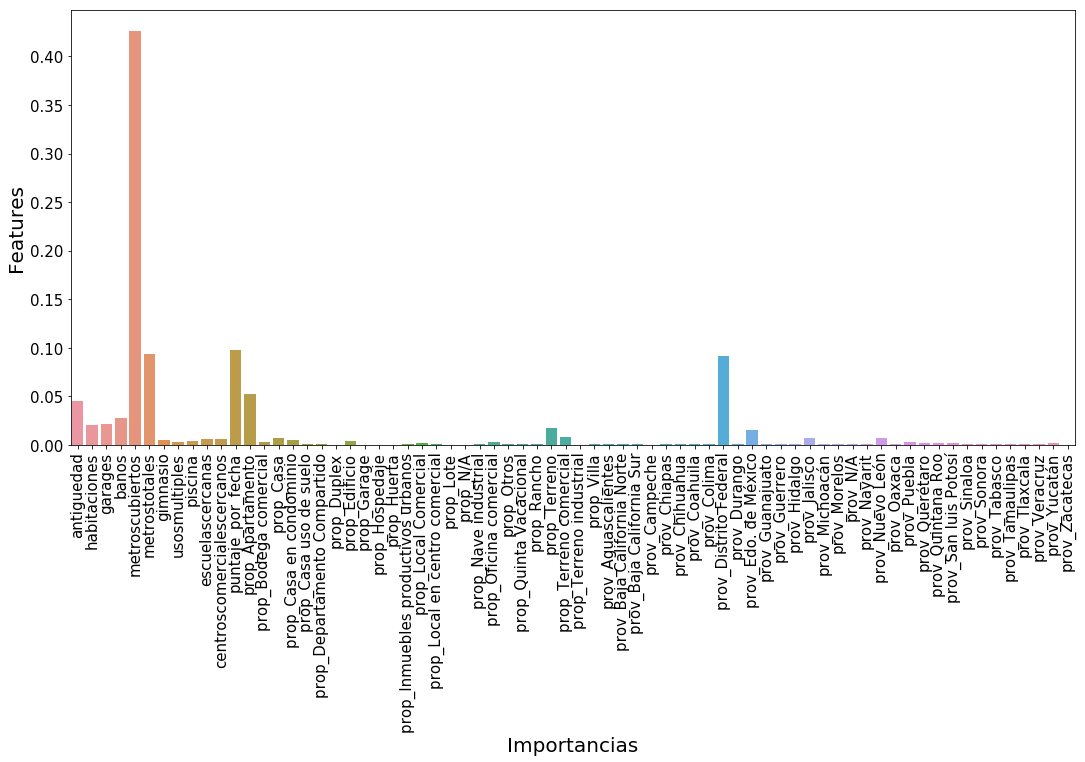

In [43]:
mostrar_importancias(X,Y,RF_model)

In [44]:
#Mido el score
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score3 = -scores.mean()
RF_mae_score3

687100.2292173688

**Es evidente que este feature funcionó muy bien, pues el escore bajó bastante luego de agregar este feature. Dado que el resultado es bueno este feature se conservará en el set de features definitivo.**

## Veamos ahora qué pasa si normalizo los datos

In [32]:
from sklearn import preprocessing 
def normalizar_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    np_scaled = min_max_scaler.fit_transform(df)
    df_norm = pd.DataFrame(np_scaled)
    df_norm.columns = df.columns
    return df_norm

In [33]:
X_normalized = normalizar_data(X)
X_normalized.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Vuelvo a evaluar el score con Random Forest y los features normalizados

In [47]:
#Mido el score
RF_model.fit(X_normalized,Y)
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score4 = -scores.mean()
RF_mae_score4

686828.390704815

# Nuevos features sobre la SVD

Aplico la SVD a los features que tengo hasta el momento, y veo dónde se concentra la energía de la matriz. La idea es crear nuevos features a partir de esta información.

In [41]:
from scipy.linalg import svd
from scipy.sparse.linalg import svds

In [32]:
# Utilizo el set de datos con todos los features creados hasta el momento
data_features = train[Numericos].join(dummies).join(dummies_prov)
#Centro los datos
centered = data_features - data_features.mean()
centered.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,-0.095042,-0.911471,-0.618175,-0.11795,-94.015558,-96.815508,-0.062475,-0.055092,-0.087383,-0.444142,...,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
1,1.904958,0.088529,0.381825,-0.11795,93.984442,3.184492,-0.062475,-0.055092,-0.087383,0.555858,...,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
2,-3.095042,0.088529,0.381825,-0.11795,-30.015558,-10.815508,-0.062475,-0.055092,-0.087383,-0.444142,...,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
3,-7.095042,-0.911471,-0.618175,-1.11795,-111.015558,-109.815508,-0.062475,-0.055092,-0.087383,0.555858,...,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392
4,1.904958,-0.911471,-0.618175,-1.11795,-79.015558,-81.815508,-0.062475,-0.055092,-0.087383,-0.444142,...,-0.019817,-0.035196,-0.007525,-0.01245,-0.004142,-0.009596,-0.003496,-0.024008,-0.033033,-0.000392


In [33]:
centered.shape

(240000, 69)

In [34]:
#hago lo mismo para el set de test
# Utilizo el set de datos con todos los features creados hasta el momento
data_features_test = test[Numericos].join(dummies_test).join(dummies_prov_test)
#Centro los datos
centered_test = data_features_test - data_features_test.mean()
centered_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,20.87465,0.084017,0.3821,1.885667,126.233567,-0.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,-0.0337,-0.000533
1,-0.12535,-1.915983,-0.6179,-1.114333,-106.766433,-109.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,0.9663,-0.000533
2,-8.12535,-0.915983,-0.6179,-0.114333,-86.766433,-76.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,-0.0337,-0.000533
3,-6.12535,-0.915983,0.3821,-0.114333,-87.766433,-90.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,-0.0337,-0.000533
4,1.87465,-0.915983,-0.6179,-1.114333,-93.766433,-100.315817,-0.06365,-0.055533,-0.088267,0.554033,...,-0.02,-0.034667,-0.008183,-0.012333,-0.004233,-0.009167,-0.003417,-0.024,-0.0337,-0.000533


In [35]:
centered_test.shape

(60000, 69)

**Calculo la SVD**

In [36]:
u, s, vt = svd(centered, full_matrices = False)

u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

In [38]:
s

array([5.46569659e+04, 2.89552557e+04, 4.22570633e+03, 4.11486324e+02,
       3.64910879e+02, 3.25099131e+02, 3.14388731e+02, 2.70693621e+02,
       2.03872905e+02, 1.72205126e+02, 1.62401724e+02, 1.46373805e+02,
       1.36742583e+02, 1.34344197e+02, 1.25193912e+02, 1.14181615e+02,
       1.10896284e+02, 1.07046944e+02, 9.90272950e+01, 9.42916479e+01,
       8.77310082e+01, 8.47716544e+01, 8.29530097e+01, 7.81620132e+01,
       7.25044876e+01, 6.76295840e+01, 6.45727694e+01, 6.27966379e+01,
       5.85382578e+01, 5.56484555e+01, 5.39089623e+01, 5.20578463e+01,
       4.99057639e+01, 4.95078375e+01, 4.82220972e+01, 4.80163535e+01,
       4.77751147e+01, 4.34659075e+01, 4.21142389e+01, 4.11707206e+01,
       3.99013525e+01, 3.73455992e+01, 3.71536574e+01, 3.65595806e+01,
       3.40776520e+01, 3.23020219e+01, 3.16132859e+01, 2.92176760e+01,
       2.77991036e+01, 2.69180609e+01, 2.14527592e+01, 1.91731781e+01,
       1.83835785e+01, 1.64580115e+01, 1.48938049e+01, 1.35264536e+01,
      

**Grafico los autovalores para detectar codos**

([<matplotlib.axis.XTick at 0x7fce079956d8>,
 <a list of 14 Text xticklabel objects>)

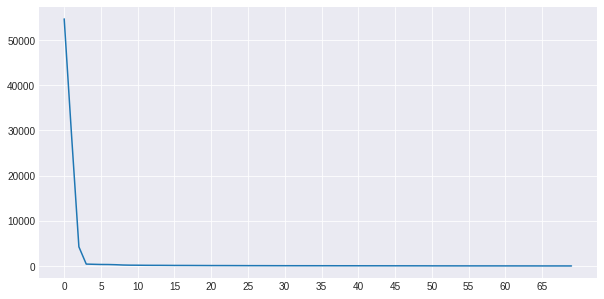

In [39]:
#Set train
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,5))
plt.plot(s)
plt.xticks(list(range(0,70,5)))

([<matplotlib.axis.XTick at 0x7fce07a1c128>,
 <a list of 14 Text xticklabel objects>)

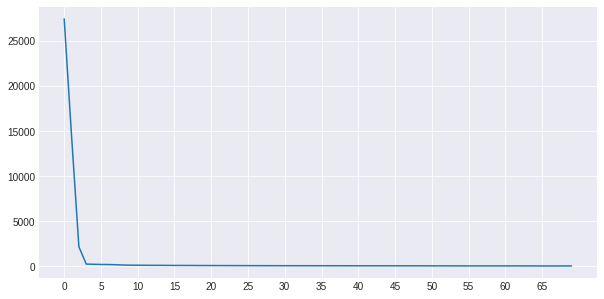

In [40]:
#Set test
plt.figure(figsize = (10,5))
plt.plot(s_test)
plt.xticks(list(range(0,70,5)))

Claramente vemos como con menos de 5 dimensiones podemos concentrar casi la totalidad de la información. 

**Veamos esto en niveles de energía**

In [41]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[7.77045115e+01 2.18077070e+01 4.64465884e-01 4.40418958e-03
 3.46360866e-03 2.74907641e-03 2.57092339e-03 1.90594883e-03
 1.08112079e-03 7.71342647e-04 6.86019503e-04 5.57290856e-04
 4.86365490e-04 4.69453970e-04 4.07682074e-04 3.39115434e-04
 3.19881543e-04 2.98060028e-04 2.55073315e-04 2.31260599e-04
 2.00198784e-04 1.86920318e-04 1.78986176e-04 1.58908332e-04
 1.36736661e-04 1.18967580e-04 1.08456109e-04 1.02571801e-04
 8.91322316e-05 8.05492359e-05 7.55922267e-05 7.04900126e-05
 6.47823368e-05 6.37533644e-05 6.04849580e-05 5.99699305e-05
 5.93688548e-05 4.91419852e-05 4.61331498e-05 4.40891910e-05
 4.14124027e-05 3.62772250e-05 3.59052818e-05 3.47662304e-05
 3.02060908e-05 2.71402978e-05 2.59952783e-05 2.22047830e-05
 2.01009590e-05 1.88470219e-05 1.19707541e-05 9.56188263e-06
 8.79053492e-06 7.04546913e-06 5.76987650e-06 4.75908093e-06
 4.34042040e-06 4.14890915e-06 3.81290749e-06 3.53870164e-06
 2.51260616e-06 2.06503337e-06 1.24822711e-06 8.41106252e-07
 5.40647633e-07 1.358118

In [42]:
energy_total

3844543732.321738

## Ahora veo la energia acumulada 


**Set de train**

In [43]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 54656.96594186719 77.7%
Number of Singular Values 2: 28955.255696048487 99.51%
Number of Singular Values 3: 4225.706334713612 99.98%
Number of Singular Values 4: 411.4863236903526 99.98%
Number of Singular Values 5: 364.91087918385756 99.98%
Number of Singular Values 6: 325.09913083357515 99.99%
Number of Singular Values 7: 314.38873055803157 99.99%
Number of Singular Values 8: 270.69362094590696 99.99%
Number of Singular Values 9: 203.87290504881483 99.99%
Number of Singular Values 10: 172.2051258890939 99.99%
Number of Singular Values 11: 162.4017235279546 99.99%
Number of Singular Values 12: 146.37380461820118 99.99%
Number of Singular Values 13: 136.74258285705804 100.0%
Number of Singular Values 14: 134.3441966689848 100.0%
Number of Singular Values 15: 125.19391212830429 100.0%
Number of Singular Values 16: 114.18161487843989 100.0%
Number of Singular Values 17: 110.8962839535457 100.0%
Number of Singular Values 18: 107.04694351819427 100.0%
Number of

Veo que con 3 dimensiones tengo el 99.98% de la energía acumulada.

Puedo tomar las primeras 3 columnas de U y multiplicarlas por las 3 primeras filas y columnas de S, para escalar los datos, y agregar esas columnas como features

In [44]:
#set de train, tomo una representación de los datos en 3 dimensiones
aprox3 = np.matrix(u[:, :3]) * np.diag(s[:3]) 
features_svd = pd.DataFrame(aprox3)
features_svd.columns = ['svd1', 'svd2', 'svd3']
features_svd.head()

,svd1,svd2,svd3
0,-133.929403,-16.609355,-0.475789
1,75.275960,-56.375616,-1.310712
2,-30.186876,10.374585,2.910903
3,-155.359628,-16.070291,6.417996
4,-112.836891,-14.313721,-2.380857


In [45]:
features_totales = data_features.join(features_svd)
features_totales.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas,svd1,svd2,svd3
0,8,2,1,2,80,80,0,0,0,0,...,0,0,0,0,0,0,0,-133.929403,-16.609355,-0.475789
1,10,3,2,2,268,180,0,0,0,1,...,0,0,0,0,0,0,0,75.275960,-56.375616,-1.310712
2,5,3,2,2,144,166,0,0,0,0,...,0,0,0,0,0,0,0,-30.186876,10.374585,2.910903
3,1,2,1,1,63,67,0,0,0,1,...,0,0,0,0,0,0,0,-155.359628,-16.070291,6.417996
4,10,2,1,1,95,95,0,0,0,0,...,0,0,0,0,0,0,0,-112.836891,-14.313721,-2.380857


Hago lo mismo para el set de test

In [46]:
#set de train, tomo una representación de los datos en 3 dimensiones
aprox3_test = np.matrix(u_test[:, :3]) * np.diag(s_test[:3]) 
features_svd_test= pd.DataFrame(aprox3_test)
features_svd_test.columns = ['svd1', 'svd2', 'svd3']
features_svd_test.head()

,svd1,svd2,svd3
0,98.364013,79.360722,-19.969468
1,-151.698027,18.429441,-0.521502
2,-115.479015,5.172338,7.572522
3,-125.008147,15.476961,5.598555
4,-135.911748,19.561245,-2.451692


In [47]:
features_totales_test = data_features_test.join(features_svd_test)
features_totales_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas,svd1,svd2,svd3
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,98.364013,79.360722,-19.969468
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,0,0,1,0,-151.698027,18.429441,-0.521502
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,0,0,0,0,-115.479015,5.172338,7.572522
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,0,0,-125.008147,15.476961,5.598555
4,10,2,1,1,80,76,0,0,0,1,...,0,0,0,0,0,0,0,-135.911748,19.561245,-2.451692


In [49]:
features_totales_test.shape

(60000, 73)

# Modelo Random Forest

### MAE score para RF

In [72]:
X = features_totales

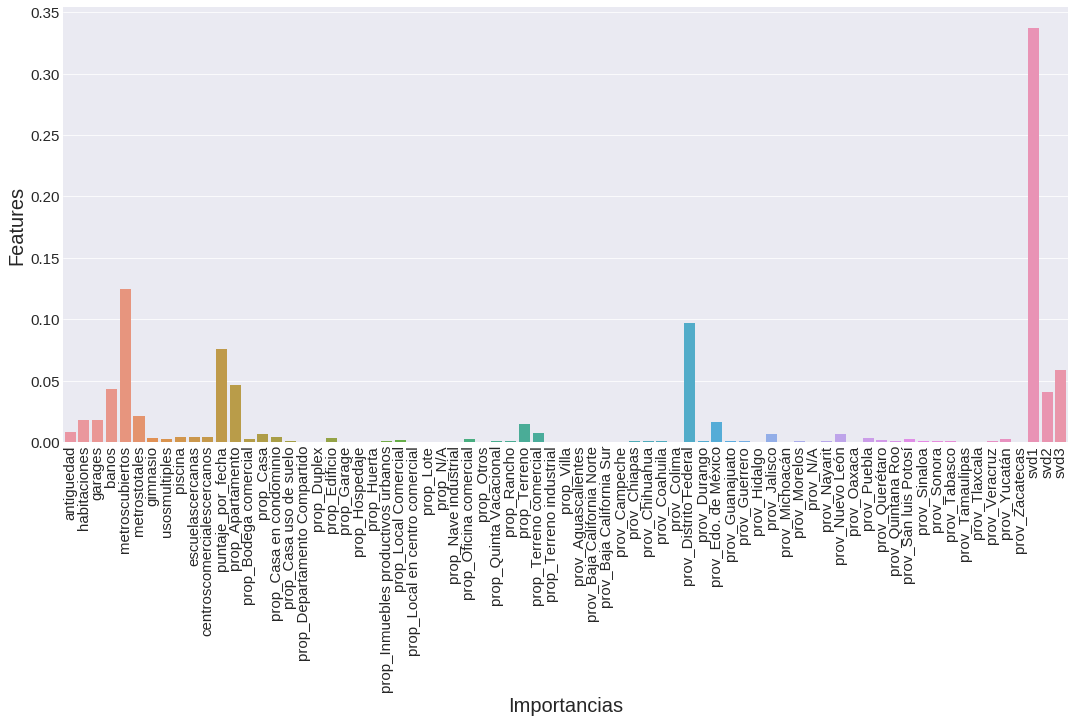

In [73]:
mostrar_importancias(X,Y,RF_model)

Como podemos observar en el gráfico los features sobre la svd son bastante importantes. 

Observemos ahora si esto implica mejoras en las predicciones de nuestro modelo o no.

In [74]:
#Mido el score con Random Forest
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score5 = -scores.mean()
RF_mae_score5

690443.9639395666

**Estos features parecen funcionar bien en mi máquina, pero al probar con un submit en Kaggle el resultado fue muy malo, por lo que se lo descarta.**

# Genero un nuevo feature tomando en cuenta las ciudades en las que se encuentran  las propiedades

In [48]:
train.ciudad.nunique()

876

**Mi idea es crear un rango de valores que pueden tomar las propiedades según las ciudades, y colocar esto como features**

Tomo el mínimo y el máximo y genero dos nuevas columnas con estos valores, asignandolo de acuerdo a la ciudad en la que se encuentra cada propiedad

In [49]:
precios_ciudades = train.groupby('ciudad').agg({'precio': ['min', 'max']}).reset_index()
precios_ciudades.columns = ['ciudad', 'precio_min', 'precio_max']
precios_ciudades.head()

,ciudad,precio_min,precio_max
0,Abalá,315000,315000
1,Abasolo,680000,8500000
2,Abejones,2500000,2500000
3,Acajete,1960000,5800000
4,Acambay,450000,5000000


Como se puede observar hay ciudades que tienen un mismo valor para el mínimo y el máximo, esto puede deberse a que sólo haya una publicación en esa ciudad, o las publicaciones correspondan a la misma propiedad o algún conjunto de propiedades que correspondan al mismo publicitante.

Solucionaremos este problema indicando para esos casos un rango mucho más amplio, para hacerlo tomaremos el mínimo de todas las ciudades y el máximo de todas las cidades.

In [50]:
minimos = list(precios_ciudades['precio_min'])
maximos = list(precios_ciudades['precio_max'])
minimo_total = min(minimos)
maximo_total = max(maximos)
for i in range(len(minimos)):
    if (minimos[i] == maximos[i]):
        minimos[i] = minimo_total
        maximos[i] = maximo_total
precios_ciudades['precio_min'] = pd.Series(minimos)
precios_ciudades['precio_max'] = pd.Series(maximos)
precios_ciudades.head()

,ciudad,precio_min,precio_max
0,Abalá,310000,12525000
1,Abasolo,680000,8500000
2,Abejones,310000,12525000
3,Acajete,1960000,5800000
4,Acambay,450000,5000000


In [51]:
train_features = train.merge(precios_ciudades, on='ciudad')
test_features = test.merge(precios_ciudades, on='ciudad', how = 'left').fillna(0)
#Como puede suceder que haya ciudades que no aparecian en el set de train tomo el mínimo y el máximo valor visto
#en el set de train para cubrir los mínimos y máximos de las ciudades que no tienen precios registrados
minimos = list(test_features['precio_min'])
maximos = list(test_features['precio_max'])
for i in range(len(minimos)):
    if (minimos[i] == maximos[i]):
        minimos[i] = minimo_total
        maximos[i] = maximo_total
test_features['precio_min'] = pd.Series(minimos)
test_features['precio_max'] = pd.Series(maximos)
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','puntaje_por_fecha',\
            'precio_min', 'precio_max']

In [52]:
test_features.shape

(60000, 25)

## Pruebo el modelo con este nuevo feature

In [81]:
X=train_features[Numericos].join(dummies).join(dummies_prov)
Y=train['precio']

In [83]:
X_test = test_features[Numericos].join(dummies_test).join(dummies_prov_test)

In [84]:
X_test.shape

(60000, 72)

# Modelo Random Forest

### MAE score para RF

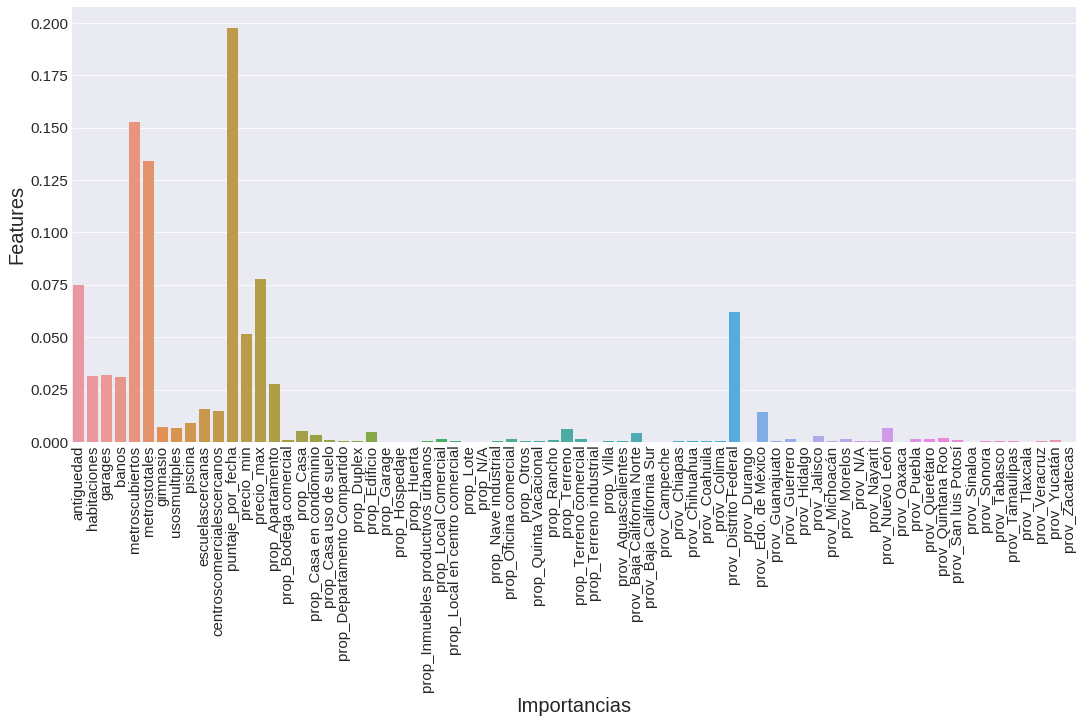

In [86]:
mostrar_importancias(X,Y, RF_model)

**Pruebo el modelo con los nuevos features de rango de precios**

In [87]:
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score6= -scores.mean()
RF_mae_score6

1594637.8689451707

**Se puede observar como estos features tampoco resultaron ser muy buenos, ni siquiera normalizando el set de features, por lo que se los descarta.**

## Veo otra alternativa para crear features sobre las ciudades

Utilizaré OneHotEncoding para crear un set de datos donde las columnas seran las ciudades y se marcará con 0 y 1 según si la publicación pertenece o no a cada ciudad. 

In [34]:
enc_ciudades = OneHotEncoder()
dummies_ciudades = enc_ciudades.fit_transform(train['ciudad'].values.reshape(-1, 1)).toarray()
dummies_ciudades = pd.DataFrame(dummies_ciudades)

dummies_ciudades.columns=enc_ciudades.categories_[0].tolist()
dummies_ciudades=dummies_ciudades.add_prefix('ciud_')
dummies_ciudades=dummies_ciudades.astype(np.int8)

In [35]:
dummies_ciudades.head()

,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,...,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
enc_ciudades = OneHotEncoder()
dummies_ciudades_test = enc_ciudades.fit_transform(test['ciudad'].values.reshape(-1, 1)).toarray()
dummies_ciudades_test = pd.DataFrame(dummies_ciudades_test)
dummies_ciudades_test.columns=enc_ciudades.categories_[0].tolist()
dummies_ciudades_test=dummies_ciudades_test.add_prefix('ciud_')
dummies_ciudades_test=dummies_ciudades_test.astype(np.int8)

In [37]:
dummies_ciudades_test.head()

,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acatic,ciud_Acolman,ciud_Acuamanala de Miguel Hidalgo,ciud_Aculco,...,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zinacantepec,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán de Juárez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Como tengo demasiadas ciudades como para generar una columna por cada una, y además la cantidad de ciudades no coinciden para el set de train y el set de test, lo que voy a hacer es utilizar la SVD para obtener features.**

In [38]:
centered = dummies_ciudades - dummies_ciudades.mean()
centered.head()

,ciud_Abalá,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acateno,ciud_Acatic,ciud_Acatzingo,...,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán,ciud_ácatlán de Juárez,ciud_ácaxochitlán,ciud_ácámbaro,ciud_áutlán de Navarro,ciud_áyotlán
0,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,...,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004
1,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,...,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004
2,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,...,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004
3,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,...,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004
4,-0.000004,-0.000025,-0.000004,-0.000033,-0.000033,-0.000004,-0.010225,-0.000004,-0.000008,-0.000008,...,-0.000033,-0.000017,-0.000867,-0.000092,-0.000004,-0.000004,-0.000021,-0.000013,-0.000004,-0.000004


In [39]:
centered_test = dummies_ciudades_test - dummies_ciudades_test.mean()
centered_test.head()

,ciud_Abasolo,ciud_Abejones,ciud_Acajete,ciud_Acambay,ciud_Acaponeta,ciud_Acapulco de Juárez,ciud_Acatic,ciud_Acolman,ciud_Acuamanala de Miguel Hidalgo,ciud_Aculco,...,ciud_Zapotlán de Juárez,ciud_Zapotlán el Grande,ciud_Zempoala,ciud_Zihuatanejo de Azueta,ciud_Zinacantepec,ciud_Zitácuaro,ciud_Zumpahuacán,ciud_Zumpango,ciud_otra,ciud_ácatlán de Juárez
0,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,-0.000033,-0.00025,-0.000017,-0.000017,...,-0.000017,-0.000017,-0.000233,-0.000567,-0.000617,-0.00005,-0.000033,-0.0009,-0.000083,-0.000033
1,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,-0.000033,-0.00025,-0.000017,-0.000017,...,-0.000017,-0.000017,-0.000233,-0.000567,-0.000617,-0.00005,-0.000033,-0.0009,-0.000083,-0.000033
2,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,-0.000033,-0.00025,-0.000017,-0.000017,...,-0.000017,-0.000017,-0.000233,-0.000567,-0.000617,-0.00005,-0.000033,-0.0009,-0.000083,-0.000033
3,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,0.988917,-0.000033,-0.00025,-0.000017,-0.000017,...,-0.000017,-0.000017,-0.000233,-0.000567,-0.000617,-0.00005,-0.000033,-0.0009,-0.000083,-0.000033
4,-0.000067,-0.000017,-0.00005,-0.000067,-0.000017,-0.011083,-0.000033,-0.00025,-0.000017,-0.000017,...,-0.000017,-0.000017,-0.000233,-0.000567,-0.000617,-0.00005,-0.000033,-0.0009,-0.000083,-0.000033


In [42]:
u, s, vt = svd(centered, full_matrices = False)

u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

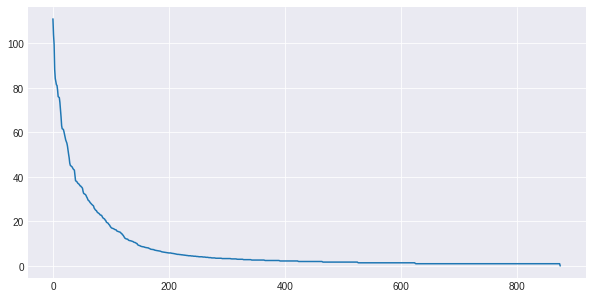

In [43]:
#Set train
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,5))
plt.plot(s)


In [44]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)

In [45]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 111.01234961051419 5.24%
Number of Singular Values 2: 103.88687274477576 9.82%
Number of Singular Values 3: 99.66048027637922 14.04%
Number of Singular Values 4: 88.3231018190471 17.36%
Number of Singular Values 5: 84.26237772531414 20.37%
Number of Singular Values 6: 82.8768112381361 23.29%
Number of Singular Values 7: 81.38929213712748 26.1%
Number of Singular Values 8: 81.1014107254277 28.9%
Number of Singular Values 9: 79.09548617615513 31.56%
Number of Singular Values 10: 76.08890067532425 34.02%
Number of Singular Values 11: 75.85566382503275 36.46%
Number of Singular Values 12: 75.62717227661057 38.89%
Number of Singular Values 13: 73.48647155400042 41.19%
Number of Singular Values 14: 70.29825314359896 43.28%
Number of Singular Values 15: 66.93590988363044 45.19%
Number of Singular Values 16: 62.99224769418371 46.87%
Number of Singular Values 17: 61.62240535410754 48.49%
Number of Singular Values 18: 61.45765411972335 50.09%
Number of Singular Value

In [46]:
singular_values = s_test
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)

In [47]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 56.04889931535425 5.34%
Number of Singular Values 2: 52.27991204885087 9.98%
Number of Singular Values 3: 49.6768108619785 14.18%
Number of Singular Values 4: 43.87423886959626 17.45%
Number of Singular Values 5: 42.62186851228902 20.54%
Number of Singular Values 6: 41.72221261345969 23.49%
Number of Singular Values 7: 40.550222609598116 26.29%
Number of Singular Values 8: 40.12225649741741 29.03%
Number of Singular Values 9: 39.2665027625164 31.65%
Number of Singular Values 10: 37.995897780472035 34.1%
Number of Singular Values 11: 37.731671675047785 36.52%
Number of Singular Values 12: 37.31784568059997 38.89%
Number of Singular Values 13: 36.48051621871589 41.15%
Number of Singular Values 14: 34.76239271687581 43.2%
Number of Singular Values 15: 32.47972164504771 44.99%
Number of Singular Values 16: 31.652123346082163 46.7%
Number of Singular Values 17: 30.878122760862507 48.32%
Number of Singular Values 18: 30.569591976170074 49.9%
Number of Singular Va

**Vemos que con 80 dimensiones podemos capturar aproximadamente el 90% de la información sobre las ciudades y con 19 el 50%.**

In [48]:
aprox19 = np.matrix(u[:, :19]) * np.diag(s[:19]) 
features_svd = pd.DataFrame(aprox19)
features_svd = features_svd.add_prefix('svd_')
features_svd.head()

,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,-0.231216,-0.871479,0.331725,-0.036399,0.014259,-0.015972,0.001510,-0.004177,0.029886,-0.000800,0.003219,-0.000200,0.015688,-0.028052,0.018855,-0.004915,0.000921,-0.000195,-0.000705
1,-0.029066,0.021721,-0.044705,0.019836,-0.010743,0.013340,-0.001404,0.003966,-0.032681,0.001076,-0.004398,0.000278,-0.025197,0.056089,-0.047834,0.016785,-0.003513,0.000752,0.002753
2,-0.026263,0.019306,-0.039266,0.016688,-0.008849,0.010898,-0.001137,0.003204,-0.026029,0.000836,-0.003412,0.000215,-0.019116,0.041056,-0.033409,0.010907,-0.002213,0.000472,0.001722
3,-0.024884,0.018146,-0.036700,0.015294,-0.008035,0.009861,-0.001024,0.002885,-0.023303,0.000742,-0.003023,0.000190,-0.016787,0.035576,-0.028474,0.009079,-0.001825,0.000389,0.001417
4,-0.154212,0.446372,0.838864,-0.045701,0.017120,-0.018964,0.001774,-0.004899,0.034649,-0.000914,0.003676,-0.000228,0.017757,-0.031437,0.020953,-0.005418,0.001013,-0.000214,-0.000775


In [49]:
aprox19_test = np.matrix(u_test[:, :19]) * np.diag(s_test[:19]) 
features_svd_test = pd.DataFrame(aprox19_test)
features_svd_test = features_svd_test.add_prefix('svd_')
features_svd_test.head()

,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,-0.047069,0.047425,-0.080342,0.045830,-0.046664,0.078231,-0.038254,0.062159,-0.249996,0.216632,0.711792,0.465718,-0.228688,0.233863,-0.037043,0.029559,-0.012181,0.007262,-0.004202
1,-0.062307,0.069781,-0.134177,0.268265,0.874543,-0.261213,0.045096,-0.052787,0.106247,-0.015212,-0.013192,0.024446,-0.038405,0.077106,-0.017080,0.014641,-0.006370,0.003870,-0.002260
2,-0.044272,0.043800,-0.072798,0.037746,-0.036683,0.058571,-0.025893,0.039783,-0.133970,0.043882,0.046845,-0.127161,0.817432,0.492455,-0.053061,0.040118,-0.015937,0.009386,-0.005400
3,-0.032795,0.030204,-0.046874,0.018513,-0.016233,0.023616,-0.008919,0.012750,-0.035883,0.007703,0.007204,-0.014963,0.029254,-0.089330,0.034301,-0.036341,0.019533,-0.012974,0.007948
4,-0.027924,0.024985,-0.037813,0.013786,-0.011805,0.016850,-0.006189,0.008749,-0.024039,0.004954,0.004591,-0.009389,0.017742,-0.049767,0.016273,-0.015922,0.007821,-0.004984,0.002984


## Pruebo el modelo

In [50]:
Numericos = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','gimnasio',\
             'usosmultiples','piscina','escuelascercanas','centroscomercialescercanos','puntaje_por_fecha']
X = train[Numericos].join(dummies).join(dummies_prov).join(features_svd)

In [51]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,8,2,1,2,80,80,0,0,0,0,...,-0.000800,0.003219,-0.000200,0.015688,-0.028052,0.018855,-0.004915,0.000921,-0.000195,-0.000705
1,10,3,2,2,268,180,0,0,0,1,...,0.001076,-0.004398,0.000278,-0.025197,0.056089,-0.047834,0.016785,-0.003513,0.000752,0.002753
2,5,3,2,2,144,166,0,0,0,0,...,0.000836,-0.003412,0.000215,-0.019116,0.041056,-0.033409,0.010907,-0.002213,0.000472,0.001722
3,1,2,1,1,63,67,0,0,0,1,...,0.000742,-0.003023,0.000190,-0.016787,0.035576,-0.028474,0.009079,-0.001825,0.000389,0.001417
4,10,2,1,1,95,95,0,0,0,0,...,-0.000914,0.003676,-0.000228,0.017757,-0.031437,0.020953,-0.005418,0.001013,-0.000214,-0.000775


In [52]:
X_test = test[Numericos].join(dummies_test).join(dummies_prov_test).join(features_svd_test)
X_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,29,3,2,4,300,176,0,0,0,0,...,0.216632,0.711792,0.465718,-0.228688,0.233863,-0.037043,0.029559,-0.012181,0.007262,-0.004202
1,8,1,1,1,67,67,0,0,0,0,...,-0.015212,-0.013192,0.024446,-0.038405,0.077106,-0.017080,0.014641,-0.006370,0.003870,-0.002260
2,0,2,1,2,87,100,0,0,0,0,...,0.043882,0.046845,-0.127161,0.817432,0.492455,-0.053061,0.040118,-0.015937,0.009386,-0.005400
3,2,2,2,2,86,86,0,0,0,0,...,0.007703,0.007204,-0.014963,0.029254,-0.089330,0.034301,-0.036341,0.019533,-0.012974,0.007948
4,10,2,1,1,80,76,0,0,0,1,...,0.004954,0.004591,-0.009389,0.017742,-0.049767,0.016273,-0.015922,0.007821,-0.004984,0.002984


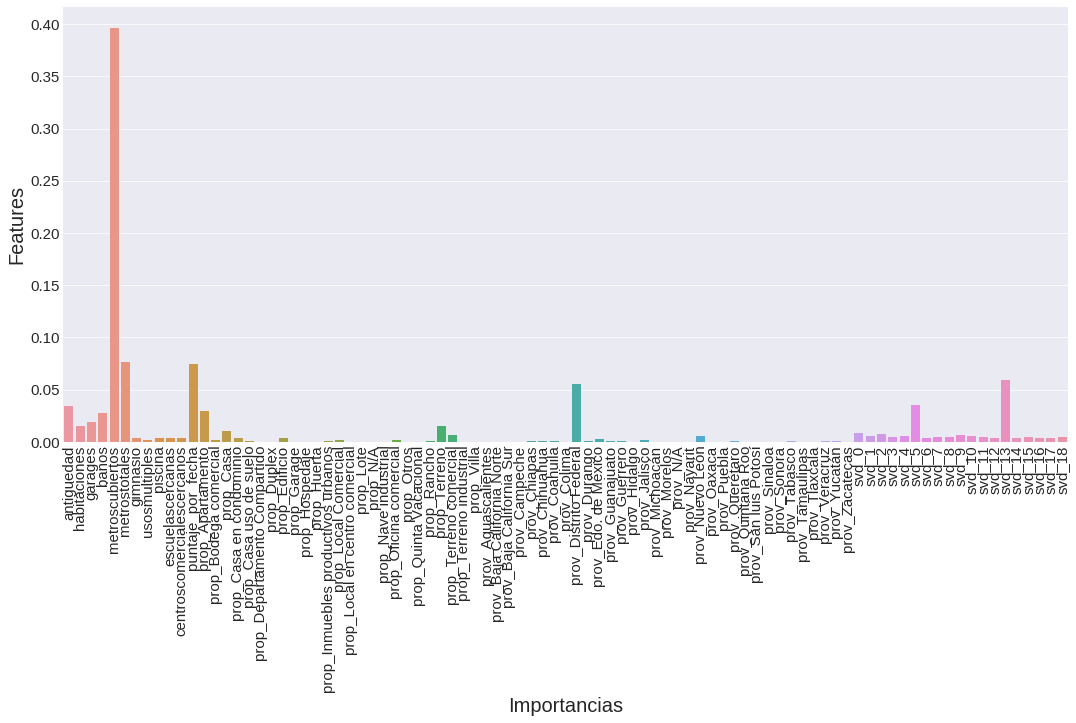

In [56]:
mostrar_importancias(X,Y, RF_model)

In [49]:
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score7= -scores.mean()
RF_mae_score7

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


616795.1911747175

## Pruebo con los datos normalizados 

In [57]:
X_normalized = normalizar_data(X)
X_test_normalized = normalizar_data(X_test)

In [58]:
X_test_normalized.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,...,0.777622,1.000000,1.000000,0.143768,0.693301,0.690882,0.278081,0.678761,0.414618,0.450477
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,...,0.603764,0.470302,0.651173,0.299512,0.507383,0.707096,0.265198,0.683407,0.412038,0.451876
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,...,0.648078,0.514167,0.531327,1.000000,1.000000,0.677872,0.287198,0.675759,0.416234,0.449614
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,...,0.620947,0.485204,0.620020,0.354889,0.309984,0.748828,0.221173,0.704112,0.399228,0.459229
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,...,0.618886,0.483294,0.624426,0.345467,0.356907,0.734186,0.238806,0.694750,0.405305,0.455653


**Pruebo el modelo con los datos normalizados**

In [56]:
#Utilizo el modelo que funciona mejor, Random Forest
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score8 = -scores.mean()
RF_mae_score8

617379.3082754344

In [ ]:
#Utilizo el n_estimators = 60
RF_model=RandomForestRegressor(n_estimators= 30,)
RF_model.fit(X,Y)
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score8 = -scores.mean()
RF_mae_score8

# Creación del archivo Submit

In [57]:
submit1 = crear_submit(RF_model,X_normalized, Y, X_test_normalized, "RF_svd_ciudades_normalized")
submit1.head()

,id,target
0,4941,2995000.0
1,51775,1167700.0
2,115253,2025800.0
3,299321,1149300.0
4,173570,662000.0
